In [5]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
import pandas as pd

In [2]:
def reg_tokenizer(x):
    retokenize = RegexpTokenizer("[^\d\W]+")
    return retokenize.tokenize(x)

In [6]:
def word_cloud(subreddit):
    # 데이터 로드
    data = pd.read_csv('./data/combined/{}.csv'.format(subreddit), header = 0)

    # NAN 처리
    data['title'].fillna('', inplace = True)
    data['selftext'].fillna('', inplace=True)

    # 제목과 내용 합침
    data['total'] = data['title'] + data['selftext']

    # 토큰화
    data['token'] = data['total'].apply(reg_tokenizer)

    # 워드클라우드 설정
    wordcloud = WordCloud(
        stopwords=STOPWORDS,
        width = 800,
        height = 800,
        background_color="white")

    # 텍스트 만들기
    text = data['total'].tolist()
    text = ''.join(text)

    # 워드클라우드 생성
    wordcloud = wordcloud.generate_from_text(text)

    # 시각화하기 위한 배열화
    array = wordcloud.to_array()

    # 워드클라우드 저장
    fig = plt.figure(figsize=(10, 10))
    plt.imshow(array, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    plt.savefig('./data/wordcloud/{}.png'.format(subreddit), dpi=300)

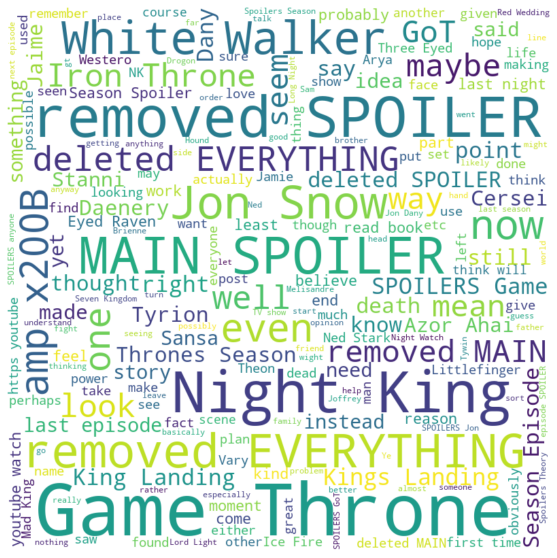

<Figure size 432x288 with 0 Axes>

In [8]:
word_cloud("gameofthrones")